In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import glob
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt

In [ ]:

def print_stats(predictions, labels):
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"F1 score = {f1}")
    return accuracy, precision, recall, f1

In [ ]:
data = pd.read_csv("359_features.csv")
X = data.drop(columns=["Label", "Unnamed: 0"])
y = data["Label"]

mi_scores = mutual_info_classif(X, y)

mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print(mi_scores_series)

In [21]:
data = pd.read_csv("359_features.csv")
X = data.drop(columns=["Label", "Unnamed: 0"])
y = data["Label"]

In [ ]:
metrics = []
confusion_matrixs = []

for n_features in range(1, X.shape[1] + 1):
    # Select the top n features based on mutual information scores
    selected_features = mi_scores_series.head(n_features).index
    X_selected = X[selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42
    )

    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X_train)

    # Predict on the test set
    preds = kmeans.predict(X_test)

    # Print and store metrics
    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, preds)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    # Store metrics for this iteration
    metrics.append(
        {
            "n_features": n_features,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
        }
    )

metrics_df = pd.DataFrame(metrics)

metrics_df.to_csv(f"feature_selection_metrics_kmeans.csv", index=False)



plt.figure(figsize=(12, 8))

plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker='o', label="Accuracy")

plt.plot(metrics_df["n_features"], metrics_df["precision"], marker='o', label="Precision")

plt.plot(metrics_df["n_features"], metrics_df["recall"], marker='o', label="Recall")

plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker='o', label="F1 Score")

plt.xlabel("Number of Features")

plt.ylabel("Score")

plt.title("Performance Metrics vs Number of Features")

plt.legend()

plt.grid(True)

plt.savefig(f"metrics_vs_features_kmeans.png")

plt.show()

In [ ]:
metrics = []
confusion_matrixs = []

for n_features in range(1, X.shape[1] + 1):
    # Select the top n features based on mutual information scores
    selected_features = mi_scores_series.head(n_features).index
    X_selected = X[selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42
    )

    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X_train)

    # Predict on the test set
    label_counts = np.bincount(preds)

# Check if there's more than one cluster
    if len(label_counts) > 1:
        if label_counts[0] > label_counts[1]:
            larger_label = 0
            smaller_label = 1
        else:
            larger_label = 1
            smaller_label = 0

    # Assign labels accordingly
        preds = np.where(preds == larger_label, 1, 0)
    else:
    # If there's only one cluster, assign all to the same label
        preds = (
        np.zeros_like(preds) if label_counts[0] == len(preds) else np.ones_like(preds)
    )

    # Assign labels accordingly
        preds = np.where(preds == larger_label, 1, 0)

    # Print and store metrics
    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, preds)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    # Store metrics for this iteration
    metrics.append(
        {
            "n_features": n_features,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
        }
    )

metrics_df = pd.DataFrame(metrics)

metrics_df.to_csv(f"feature_selection_metrics_kmeans.csv", index=False)


plt.figure(figsize=(12, 8))

plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")

plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)

plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")

plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")

plt.xlabel("Number of Features")

plt.ylabel("Score")

plt.title("Performance Metrics vs Number of Features")

plt.legend()

plt.grid(True)

plt.savefig(f"metrics_vs_features_kmeans.png")

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert metrics to DataFrame and save to CSV
metrics_df = pd.read_csv("feature_selection_metrics_kmeans.csv")

# Filter metrics for n_features from 1 to 50
filtered_metrics_df = metrics_df[metrics_df["n_features"].between(50, 70)]

#lot metrics for the filtered range
plt.figure(figsize=(12, 8))
plt.plot(
    filtered_metrics_df["n_features"],
    filtered_metrics_df["accuracy"],
    marker="o",
    label="Accuracy",
)
plt.plot(
    filtered_metrics_df["n_features"],
    filtered_metrics_df["precision"],
    marker="o",
    label="Precision",
)
plt.plot(
    filtered_metrics_df["n_features"],
    filtered_metrics_df["recall"],
    marker="o",
    label="Recall",
)
plt.plot(
    filtered_metrics_df["n_features"],
    filtered_metrics_df["f1_score"],
    marker="o",
    label="F1 Score",
)
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("Performance Metrics vs Number of Features (1 to 50)")
plt.legend()
plt.grid(True)
plt.savefig("metrics_vs_features_1_to_50.png")
plt.show()

In [25]:
selected_features = mi_scores_series.head(61).index
X= X[selected_features]

In [ ]:
X.shape

In [26]:
metrics

[{'n_features': 1,
  'accuracy': 0.9956987925896341,
  'precision': 0.9958959484062085,
  'recall': 0.9997831541773798,
  'f1_score': 0.997835765520653},
 {'n_features': 2,
  'accuracy': 0.9987403606869643,
  'precision': 0.9990094105993066,
  'recall': 0.9997211982280598,
  'f1_score': 0.9993651776728343},
 {'n_features': 3,
  'accuracy': 0.9985253003164459,
  'precision': 0.9987003744159421,
  'recall': 0.9998141321520398,
  'f1_score': 0.9992569429394099},
 {'n_features': 4,
  'accuracy': 0.9984024086761498,
  'precision': 0.9985767767086414,
  'recall': 0.9998141321520398,
  'f1_score': 0.9991950713600198},
 {'n_features': 5,
  'accuracy': 0.9984945774063719,
  'precision': 0.9986694721207996,
  'recall': 0.9998141321520398,
  'f1_score': 0.999241474326228},
 {'n_features': 6,
  'accuracy': 0.9985253003164459,
  'precision': 0.9987003744159421,
  'recall': 0.9998141321520398,
  'f1_score': 0.9992569429394099},
 {'n_features': 7,
  'accuracy': 0.9986174690466681,
  'precision': 0.99

Index(['86'], dtype='object')
Number of Features: 1
Accuracy = 0.9956987925896341
Precision = 0.9958959484062085
Recall = 0.9997831541773798
F1 score = 0.997835765520653
[[  135   133]
 [    7 32274]]
Index(['101', '86'], dtype='object')
Number of Features: 2
Accuracy = 0.9987403606869643
Precision = 0.9990094105993066
Recall = 0.9997211982280598
F1 score = 0.9993651776728343
[[  236    32]
 [    9 32272]]
Index(['101', '86', '130'], dtype='object')
Number of Features: 3
Accuracy = 0.9985253003164459
Precision = 0.9987003744159421
Recall = 0.9998141321520398
F1 score = 0.9992569429394099
[[  226    42]
 [    6 32275]]
Index(['101', '86', '131', '130'], dtype='object')
Number of Features: 4
Accuracy = 0.9984024086761498
Precision = 0.9985767767086414
Recall = 0.9998141321520398
F1 score = 0.9991950713600198
[[  222    46]
 [    6 32275]]
Index(['101', '86', '131', '130', '85'], dtype='object')
Number of Features: 5
Accuracy = 0.9984945774063719
Precision = 0.9986694721207996
Recall = 0.

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=62 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 62
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=63 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 63
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=64 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 64
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=65 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 65
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=66 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 66
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=67 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 67
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=68 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 68
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=69 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 69
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=70 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 70
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=71 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 71
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=72 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 72
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=73 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 73
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=74 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 74
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=75 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 75
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=76 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 76
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=77 > n_features=61. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['393', '237', '222', '383', '382', '232', '212', '147', '142', '227',
       '342', '22', '62', '217', '267', '47', '343', '302', '312', '152',
       '337', '132', '52', '122', '172', '365', '101', '81', '86', '80', '106',
       '105', '100', '57', '111', '117', '131', '366', '130', '85', '187',
       '110', '136', '126', '96', '121', '42', '125', '135', '120', '153',
       '137', '0', '327', '95', '116', '91', '141', '79', '192', '140'],
      dtype='object')
Number of Features: 77
Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]


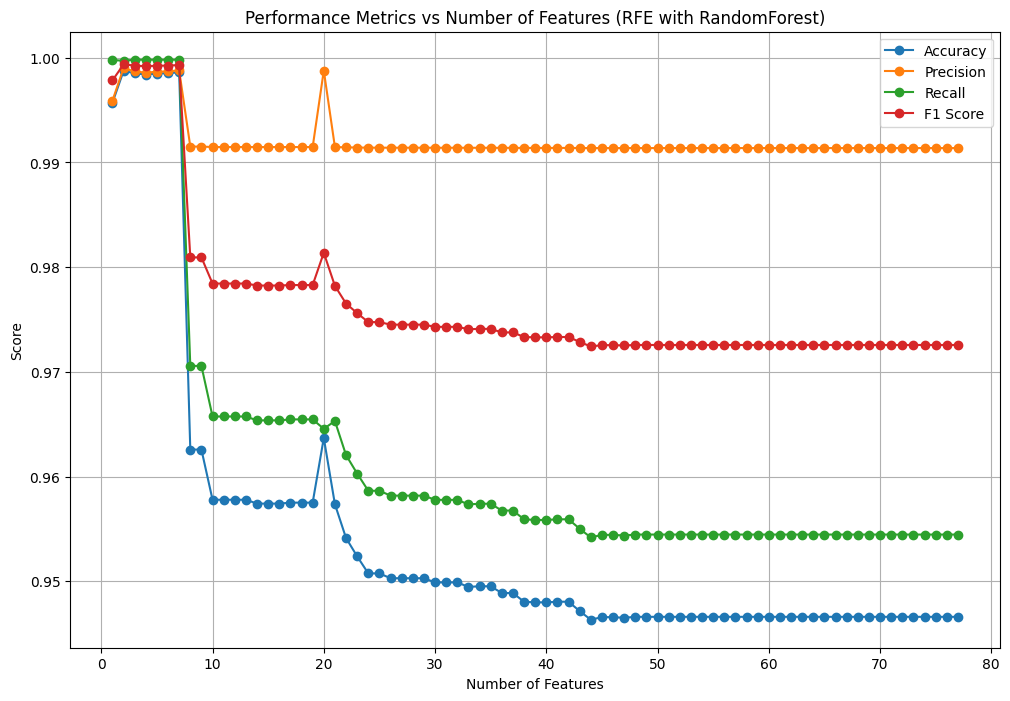

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

metrics = []
confusion_matrixs = []
rf = RandomForestClassifier(n_estimators=100, random_state=42)

for n_features in range(1, 78):

    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    X_selected = rfe.fit_transform(X, y)
    # Get the selected feature names
    selected_features = X.columns[rfe.support_]
    print(selected_features)

    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42
    )

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X_train)
    preds = kmeans.predict(X_test)

    label_counts = np.bincount(preds)
    if len(label_counts) > 1:
        # Identify which label corresponds to the larger cluster
        if label_counts[0] > label_counts[1]:
            larger_label = 0
        else:
            larger_label = 1
        # Assign labels accordingl
        preds = np.where(preds == larger_label, 1, 0)
    else:
        # If only one cluster is found, assign all predictions to label 0
        preds = np.zeros_like(preds)

    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, preds)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    # Store metrics for this iteration
    metrics.append(
        {
            "n_features": n_features,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
        }
    )

metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f"/content/drive/MyDrive/kmeans_11_30.csv", index=False)

# Plot metrics
plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("Performance Metrics vs Number of Features (RFE with RandomForest)")
plt.legend()
plt.grid(True)
plt.savefig(f"metrics_vs_features_rfe_rf.png")
plt.show()

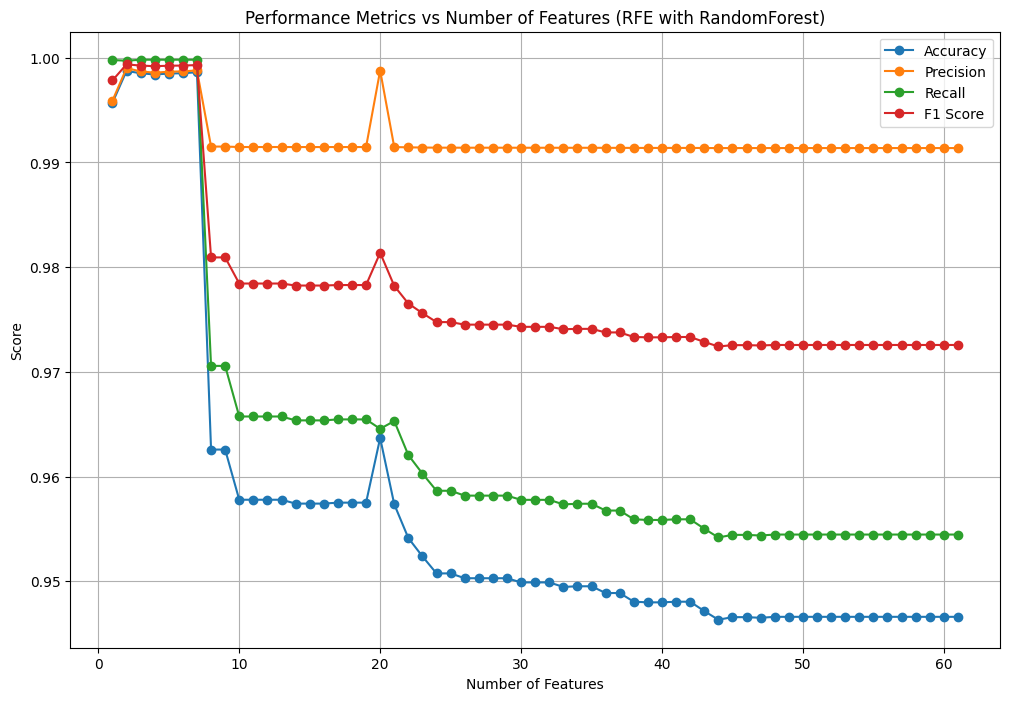

In [27]:
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.head(61)
metrics_df.to_csv(f"/content/drive/MyDrive/kmeans_11_30.csv", index=False)

# Plot metrics
plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("Performance Metrics vs Number of Features (RFE with RandomForest)")
plt.legend()
plt.grid(True)
plt.savefig(f"metrics_vs_features_rfe_rf.png")
plt.show()

In [32]:
data = pd.read_csv("359_features.csv")
X = data.drop(columns=["Label", "Unnamed: 0"])
y = data["Label"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_train)
preds = kmeans.predict(X_test)
label_counts = np.bincount(preds)

# Check if there's more than one cluster
if len(label_counts) > 1:
    if label_counts[0] > label_counts[1]:
        larger_label = 0
        smaller_label = 1
    else:
        larger_label = 1
        smaller_label = 0

    # Assign labels accordingly
    preds = np.where(preds == larger_label, 1, 0)
    
accuracy, precision, recall, f1 = print_stats(preds, y_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, preds)
print(conf_matrix)

Accuracy = 0.9466035822913146
Precision = 0.991376813925802
Recall = 0.9544623772497755
F1 score = 0.9725694444444445
[[    0   268]
 [ 1470 30811]]
